# Mask R-CNN demo

This notebook illustrates one possible way of using `maskrcnn_benchmark` for computing predictions on images from an arbitrary URL.

Let's start with a few standard imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

Those are the relevant imports for the detection model

In [3]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

We provide a helper class `COCODemo`, which loads a model from the config file, and performs pre-processing, model prediction and post-processing for us.

We can configure several model options by overriding the config options.
In here, we make the model run on the CPU

In [4]:
config_file = "../configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

Now we create the `COCODemo` object. It contains a few extra options for conveniency, such as the confidence threshold for detections to be shown.

In [5]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

Let's define a few helper functions for loading images from a URL

In [6]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

Let's now load an image from the COCO dataset. It's reference is in the comment

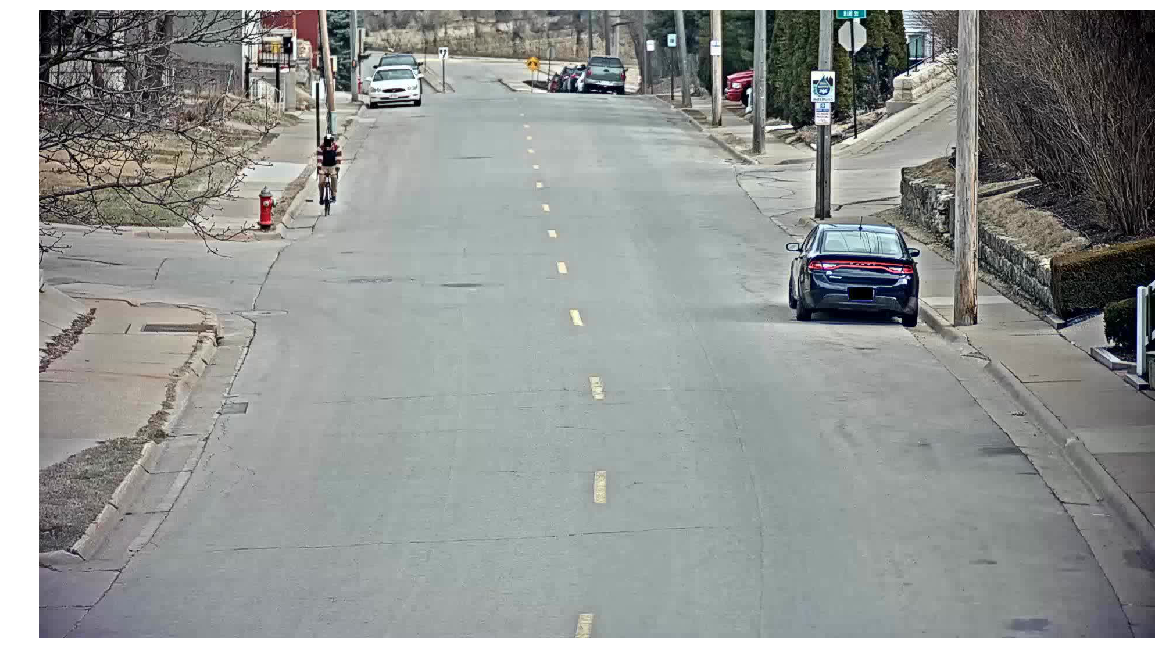

In [7]:
# from http://cocodataset.org/#explore?id=345434
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pil_image = Image.open("frame_000.jpg").convert("RGB")
image = np.array(pil_image)[:, :, [2, 1, 0]]
imshow(image)

### Computing the predictions

We provide a `run_on_opencv_image` function, which takes an image as it was loaded by OpenCV (in `BGR` format), and computes the predictions on them, returning an image with the predictions overlayed on the image.

BoxList(num_boxes=9, image_width=1920, image_height=1080, mode=xyxy)


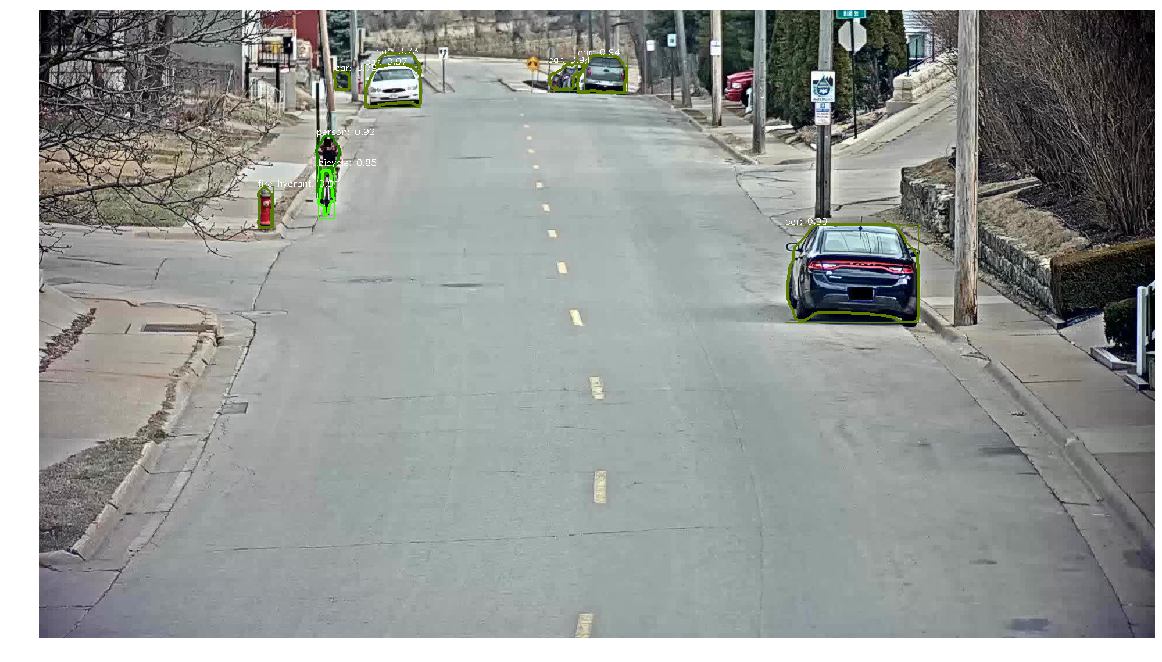

In [8]:
# compute predictions
predictions, top_predictions = coco_demo.run_on_opencv_image(image)
print(predictions.fields)
imshow(predictions)

In [109]:
print(top_predictions.get_field('labels'))

with open('prueba.txt','w') as f:
    
    for n, (label, bbox, score) in enumerate(zip(top_predictions.get_field('labels'),top_predictions.bbox, top_predictions.get_field('scores'))):
        if int(label==3):
            f.write("n_frame,-1,{},{},{},{},{:.3f},-1,-1,-1\n".format(int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3]), float(score)))
    


tensor([ 3,  3,  3,  3,  1, 11,  2,  3,  3])


In [138]:
import glob
from tqdm import tqdm

images = glob.glob('/Users/pablo/Repo/m6/mcv-m6-2019-team3/datasets/AICity_data/train/S03/c010/frames/*.jpg')
#print(images)
with open('prueba.txt','w') as f:
        
    pbar = tqdm(total=2140)
        
    for n, image in enumerate(sorted(images)):
        
        # Read images
        pil_image = Image.open(image).convert("RGB")
        img = np.array(pil_image)[:, :, [2, 1, 0]]
        
        # Get detections
        _, top_predictions = coco_demo.run_on_opencv_image(img)
        
        # Save detections
        for label, bbox, score in zip(top_predictions.get_field('labels'),top_predictions.bbox, top_predictions.get_field('scores')):
            if int(label==3):
                width = int(bbox[2])-int(bbox[0])
                height = int(bbox[3])-int(bbox[1])
                f.write("{},-1,{},{},{},{},{:.3f},-1,-1,-1\n".format(n+1, int(bbox[0]), int(bbox[1]), width, height, float(score)))
    
        pbar.update(1)
    
    pbar.close()



  0%|          | 0/2140 [00:00<?, ?it/s]

  0%|          | 1/2140 [00:07<4:18:50,  7.26s/it]

  0%|          | 2/2140 [00:13<4:12:31,  7.09s/it]

  0%|          | 3/2140 [00:20<4:04:35,  6.87s/it]

  0%|          | 4/2140 [00:27<4:04:36,  6.87s/it]

  0%|          | 5/2140 [00:34<4:08:28,  6.98s/it]

  0%|          | 6/2140 [00:41<4:09:20,  7.01s/it]

  0%|          | 7/2140 [00:48<4:08:45,  7.00s/it]

  0%|          | 8/2140 [00:55<4:08:43,  7.00s/it]

  0%|          | 9/2140 [01:03<4:19:42,  7.31s/it]

  0%|          | 10/2140 [01:12<4:35:13,  7.75s/it]

  1%|          | 11/2140 [01:20<4:36:53,  7.80s/it]

  1%|          | 12/2140 [01:31<5:11:10,  8.77s/it]

  1%|          | 13/2140 [01:43<5:49:38,  9.86s/it]

  1%|          | 14/2140 [01:55<6:12:17, 10.51s/it]

  1%|          | 15/2140 [02:09<6:47:54, 11.52s/it]

  1%|          | 16/2140 [02:23<7:11:29, 12.19s/it]

  1%|          | 17/2140 [02:42<8:22:53, 14.21s/it]

  1%|          | 18/2140 [03:01<9:17:32, 15.76s/it]

  1%|      

  6%|▋         | 138/2140 [18:43<3:48:39,  6.85s/it]

  6%|▋         | 139/2140 [18:50<3:48:18,  6.85s/it]

  7%|▋         | 140/2140 [18:57<3:48:26,  6.85s/it]

  7%|▋         | 141/2140 [19:04<3:48:35,  6.86s/it]

  7%|▋         | 142/2140 [19:11<3:45:30,  6.77s/it]

  7%|▋         | 143/2140 [19:17<3:43:22,  6.71s/it]

  7%|▋         | 144/2140 [19:25<3:50:12,  6.92s/it]

  7%|▋         | 145/2140 [19:34<4:11:29,  7.56s/it]

  7%|▋         | 146/2140 [19:41<4:08:42,  7.48s/it]

  7%|▋         | 147/2140 [19:48<4:07:00,  7.44s/it]

  7%|▋         | 148/2140 [19:55<4:04:42,  7.37s/it]

  7%|▋         | 149/2140 [20:03<4:07:06,  7.45s/it]

  7%|▋         | 150/2140 [20:10<4:04:52,  7.38s/it]

  7%|▋         | 151/2140 [20:17<3:58:19,  7.19s/it]

  7%|▋         | 152/2140 [20:24<3:57:00,  7.15s/it]

  7%|▋         | 153/2140 [20:32<4:04:19,  7.38s/it]

  7%|▋         | 154/2140 [20:39<4:01:03,  7.28s/it]

  7%|▋         | 155/2140 [20:46<3:57:09,  7.17s/it]

  7%|▋         | 156/2140 [2

 13%|█▎        | 274/2140 [34:45<3:29:58,  6.75s/it]

 13%|█▎        | 275/2140 [34:54<3:56:13,  7.60s/it]

 13%|█▎        | 276/2140 [35:03<4:04:46,  7.88s/it]

 13%|█▎        | 277/2140 [35:11<4:13:17,  8.16s/it]

 13%|█▎        | 278/2140 [35:19<4:08:53,  8.02s/it]

 13%|█▎        | 279/2140 [35:27<4:09:51,  8.06s/it]

 13%|█▎        | 280/2140 [35:34<3:59:27,  7.72s/it]

 13%|█▎        | 281/2140 [35:43<4:06:10,  7.95s/it]

 13%|█▎        | 282/2140 [35:50<4:04:05,  7.88s/it]

 13%|█▎        | 283/2140 [35:59<4:06:08,  7.95s/it]

 13%|█▎        | 284/2140 [36:05<3:56:06,  7.63s/it]

 13%|█▎        | 285/2140 [36:13<3:50:49,  7.47s/it]

 13%|█▎        | 286/2140 [36:19<3:45:20,  7.29s/it]

 13%|█▎        | 287/2140 [36:27<3:46:41,  7.34s/it]

 13%|█▎        | 288/2140 [36:33<3:38:35,  7.08s/it]

 14%|█▎        | 289/2140 [36:42<3:50:33,  7.47s/it]

 14%|█▎        | 290/2140 [36:50<3:55:23,  7.63s/it]

 14%|█▎        | 291/2140 [36:57<3:50:15,  7.47s/it]

 14%|█▎        | 292/2140 [3

 19%|█▉        | 410/2140 [51:52<4:26:42,  9.25s/it]

 19%|█▉        | 411/2140 [52:00<4:19:51,  9.02s/it]

 19%|█▉        | 412/2140 [52:09<4:15:02,  8.86s/it]

 19%|█▉        | 413/2140 [52:20<4:31:59,  9.45s/it]

 19%|█▉        | 414/2140 [52:29<4:27:59,  9.32s/it]

 19%|█▉        | 415/2140 [52:41<4:49:13, 10.06s/it]

 19%|█▉        | 416/2140 [52:49<4:34:23,  9.55s/it]

 19%|█▉        | 417/2140 [52:56<4:12:10,  8.78s/it]

 20%|█▉        | 418/2140 [53:06<4:19:07,  9.03s/it]

 20%|█▉        | 419/2140 [53:13<4:08:46,  8.67s/it]

 20%|█▉        | 420/2140 [53:21<3:56:00,  8.23s/it]

 20%|█▉        | 421/2140 [53:28<3:47:40,  7.95s/it]

 20%|█▉        | 422/2140 [53:36<3:46:42,  7.92s/it]

 20%|█▉        | 423/2140 [53:43<3:39:00,  7.65s/it]

 20%|█▉        | 424/2140 [53:51<3:46:54,  7.93s/it]

 20%|█▉        | 425/2140 [54:00<3:48:44,  8.00s/it]

 20%|█▉        | 426/2140 [54:07<3:43:14,  7.82s/it]

 20%|█▉        | 427/2140 [54:14<3:40:57,  7.74s/it]

 20%|██        | 428/2140 [5

 25%|██▌       | 544/2140 [1:08:48<2:57:48,  6.68s/it]

 25%|██▌       | 545/2140 [1:08:54<2:55:14,  6.59s/it]

 26%|██▌       | 546/2140 [1:09:01<2:54:38,  6.57s/it]

 26%|██▌       | 547/2140 [1:09:07<2:53:16,  6.53s/it]

 26%|██▌       | 548/2140 [1:09:14<2:51:23,  6.46s/it]

 26%|██▌       | 549/2140 [1:09:20<2:53:29,  6.54s/it]

 26%|██▌       | 550/2140 [1:09:29<3:07:02,  7.06s/it]

 26%|██▌       | 551/2140 [1:09:37<3:15:43,  7.39s/it]

 26%|██▌       | 552/2140 [1:09:43<3:10:11,  7.19s/it]

 26%|██▌       | 553/2140 [1:09:50<3:05:02,  7.00s/it]

 26%|██▌       | 554/2140 [1:09:56<3:01:14,  6.86s/it]

 26%|██▌       | 555/2140 [1:10:03<2:58:40,  6.76s/it]

 26%|██▌       | 556/2140 [1:10:10<2:57:29,  6.72s/it]

 26%|██▌       | 557/2140 [1:10:16<2:53:41,  6.58s/it]

 26%|██▌       | 558/2140 [1:10:22<2:52:58,  6.56s/it]

 26%|██▌       | 559/2140 [1:10:29<2:49:46,  6.44s/it]

 26%|██▌       | 560/2140 [1:10:35<2:47:52,  6.38s/it]

 26%|██▌       | 561/2140 [1:10:41<2:46:31,  6.3

 32%|███▏      | 676/2140 [1:22:53<2:27:37,  6.05s/it]

 32%|███▏      | 677/2140 [1:22:59<2:28:15,  6.08s/it]

 32%|███▏      | 678/2140 [1:23:05<2:30:47,  6.19s/it]

 32%|███▏      | 679/2140 [1:23:11<2:28:58,  6.12s/it]

 32%|███▏      | 680/2140 [1:23:17<2:27:55,  6.08s/it]

 32%|███▏      | 681/2140 [1:23:23<2:26:50,  6.04s/it]

 32%|███▏      | 682/2140 [1:23:29<2:26:32,  6.03s/it]

 32%|███▏      | 683/2140 [1:23:35<2:27:53,  6.09s/it]

 32%|███▏      | 684/2140 [1:23:41<2:26:40,  6.04s/it]

 32%|███▏      | 685/2140 [1:23:47<2:25:53,  6.02s/it]

 32%|███▏      | 686/2140 [1:23:54<2:29:20,  6.16s/it]

 32%|███▏      | 687/2140 [1:24:00<2:29:34,  6.18s/it]

 32%|███▏      | 688/2140 [1:24:08<2:42:19,  6.71s/it]

 32%|███▏      | 689/2140 [1:24:16<2:55:48,  7.27s/it]

 32%|███▏      | 690/2140 [1:24:26<3:14:08,  8.03s/it]

 32%|███▏      | 691/2140 [1:24:33<3:01:53,  7.53s/it]

 32%|███▏      | 692/2140 [1:24:39<2:51:44,  7.12s/it]

 32%|███▏      | 693/2140 [1:24:45<2:43:28,  6.7

 38%|███▊      | 808/2140 [1:36:58<2:18:39,  6.25s/it]

 38%|███▊      | 809/2140 [1:37:06<2:25:44,  6.57s/it]

 38%|███▊      | 810/2140 [1:37:13<2:31:26,  6.83s/it]

 38%|███▊      | 811/2140 [1:37:21<2:34:55,  6.99s/it]

 38%|███▊      | 812/2140 [1:37:28<2:39:15,  7.20s/it]

 38%|███▊      | 813/2140 [1:37:35<2:37:18,  7.11s/it]

 38%|███▊      | 814/2140 [1:37:41<2:31:44,  6.87s/it]

 38%|███▊      | 815/2140 [1:37:48<2:27:51,  6.70s/it]

 38%|███▊      | 816/2140 [1:37:54<2:26:38,  6.65s/it]

 38%|███▊      | 817/2140 [1:38:01<2:25:39,  6.61s/it]

 38%|███▊      | 818/2140 [1:38:08<2:29:32,  6.79s/it]

 38%|███▊      | 819/2140 [1:38:15<2:30:06,  6.82s/it]

 38%|███▊      | 820/2140 [1:38:21<2:27:51,  6.72s/it]

 38%|███▊      | 821/2140 [1:38:28<2:25:44,  6.63s/it]

 38%|███▊      | 822/2140 [1:38:34<2:21:55,  6.46s/it]

 38%|███▊      | 823/2140 [1:38:40<2:19:09,  6.34s/it]

 39%|███▊      | 824/2140 [1:38:46<2:16:51,  6.24s/it]

 39%|███▊      | 825/2140 [1:38:52<2:14:56,  6.1

 44%|████▍     | 940/2140 [1:50:51<2:06:02,  6.30s/it]

 44%|████▍     | 941/2140 [1:50:57<2:05:52,  6.30s/it]

 44%|████▍     | 942/2140 [1:51:04<2:06:52,  6.35s/it]

 44%|████▍     | 943/2140 [1:51:10<2:06:59,  6.37s/it]

 44%|████▍     | 944/2140 [1:51:16<2:06:31,  6.35s/it]

 44%|████▍     | 945/2140 [1:51:23<2:05:33,  6.30s/it]

 44%|████▍     | 946/2140 [1:51:29<2:05:35,  6.31s/it]

 44%|████▍     | 947/2140 [1:51:36<2:09:16,  6.50s/it]

 44%|████▍     | 948/2140 [1:51:42<2:07:46,  6.43s/it]

 44%|████▍     | 949/2140 [1:51:48<2:06:59,  6.40s/it]

 44%|████▍     | 950/2140 [1:51:55<2:06:06,  6.36s/it]

 44%|████▍     | 951/2140 [1:52:01<2:05:41,  6.34s/it]

 44%|████▍     | 952/2140 [1:52:07<2:04:42,  6.30s/it]

 45%|████▍     | 953/2140 [1:52:13<2:04:03,  6.27s/it]

 45%|████▍     | 954/2140 [1:52:20<2:05:15,  6.34s/it]

 45%|████▍     | 955/2140 [1:52:26<2:04:03,  6.28s/it]

 45%|████▍     | 956/2140 [1:52:32<2:03:41,  6.27s/it]

 45%|████▍     | 957/2140 [1:52:39<2:04:23,  6.3

 50%|█████     | 1071/2140 [2:04:24<1:50:13,  6.19s/it]

 50%|█████     | 1072/2140 [2:04:30<1:50:13,  6.19s/it]

 50%|█████     | 1073/2140 [2:04:36<1:49:52,  6.18s/it]

 50%|█████     | 1074/2140 [2:04:42<1:49:32,  6.17s/it]

 50%|█████     | 1075/2140 [2:04:48<1:48:54,  6.14s/it]

 50%|█████     | 1076/2140 [2:04:55<1:50:46,  6.25s/it]

 50%|█████     | 1077/2140 [2:05:01<1:50:58,  6.26s/it]

 50%|█████     | 1078/2140 [2:05:08<1:51:57,  6.33s/it]

 50%|█████     | 1079/2140 [2:05:14<1:50:39,  6.26s/it]

 50%|█████     | 1080/2140 [2:05:20<1:49:43,  6.21s/it]

 51%|█████     | 1081/2140 [2:05:26<1:50:23,  6.25s/it]

 51%|█████     | 1082/2140 [2:05:32<1:49:50,  6.23s/it]

 51%|█████     | 1083/2140 [2:05:39<1:50:03,  6.25s/it]

 51%|█████     | 1084/2140 [2:05:45<1:49:25,  6.22s/it]

 51%|█████     | 1085/2140 [2:05:51<1:48:41,  6.18s/it]

 51%|█████     | 1086/2140 [2:05:57<1:48:11,  6.16s/it]

 51%|█████     | 1087/2140 [2:06:03<1:49:28,  6.24s/it]

 51%|█████     | 1088/2140 [2:0

 56%|█████▌    | 1201/2140 [2:17:51<1:37:25,  6.23s/it]

 56%|█████▌    | 1202/2140 [2:17:57<1:36:44,  6.19s/it]

 56%|█████▌    | 1203/2140 [2:18:03<1:36:35,  6.19s/it]

 56%|█████▋    | 1204/2140 [2:18:09<1:36:08,  6.16s/it]

 56%|█████▋    | 1205/2140 [2:18:16<1:36:53,  6.22s/it]

 56%|█████▋    | 1206/2140 [2:18:22<1:35:58,  6.17s/it]

 56%|█████▋    | 1207/2140 [2:18:28<1:36:05,  6.18s/it]

 56%|█████▋    | 1208/2140 [2:18:34<1:36:17,  6.20s/it]

 56%|█████▋    | 1209/2140 [2:18:40<1:35:49,  6.18s/it]

 57%|█████▋    | 1210/2140 [2:18:47<1:36:47,  6.24s/it]

 57%|█████▋    | 1211/2140 [2:18:53<1:36:10,  6.21s/it]

 57%|█████▋    | 1212/2140 [2:18:59<1:35:34,  6.18s/it]

 57%|█████▋    | 1213/2140 [2:19:05<1:35:01,  6.15s/it]

 57%|█████▋    | 1214/2140 [2:19:11<1:34:39,  6.13s/it]

 57%|█████▋    | 1215/2140 [2:19:17<1:35:07,  6.17s/it]

 57%|█████▋    | 1216/2140 [2:19:24<1:34:29,  6.14s/it]

 57%|█████▋    | 1217/2140 [2:19:30<1:33:51,  6.10s/it]

 57%|█████▋    | 1218/2140 [2:1

 62%|██████▏   | 1331/2140 [2:31:07<1:21:24,  6.04s/it]

 62%|██████▏   | 1332/2140 [2:31:13<1:21:43,  6.07s/it]

 62%|██████▏   | 1333/2140 [2:31:19<1:21:42,  6.07s/it]

 62%|██████▏   | 1334/2140 [2:31:25<1:21:24,  6.06s/it]

 62%|██████▏   | 1335/2140 [2:31:32<1:25:33,  6.38s/it]

 62%|██████▏   | 1336/2140 [2:31:39<1:26:37,  6.46s/it]

 62%|██████▏   | 1337/2140 [2:31:45<1:25:28,  6.39s/it]

 63%|██████▎   | 1338/2140 [2:31:51<1:24:30,  6.32s/it]

 63%|██████▎   | 1339/2140 [2:31:58<1:24:38,  6.34s/it]

 63%|██████▎   | 1340/2140 [2:32:04<1:23:53,  6.29s/it]

 63%|██████▎   | 1341/2140 [2:32:10<1:23:09,  6.24s/it]

 63%|██████▎   | 1342/2140 [2:32:16<1:22:41,  6.22s/it]

 63%|██████▎   | 1343/2140 [2:32:23<1:22:42,  6.23s/it]

 63%|██████▎   | 1344/2140 [2:32:29<1:22:11,  6.20s/it]

 63%|██████▎   | 1345/2140 [2:32:35<1:21:58,  6.19s/it]

 63%|██████▎   | 1346/2140 [2:32:41<1:22:38,  6.24s/it]

 63%|██████▎   | 1347/2140 [2:32:47<1:21:47,  6.19s/it]

 63%|██████▎   | 1348/2140 [2:3

 68%|██████▊   | 1461/2140 [2:44:33<1:08:58,  6.09s/it]

 68%|██████▊   | 1462/2140 [2:44:39<1:08:40,  6.08s/it]

 68%|██████▊   | 1463/2140 [2:44:46<1:09:10,  6.13s/it]

 68%|██████▊   | 1464/2140 [2:44:52<1:10:00,  6.21s/it]

 68%|██████▊   | 1465/2140 [2:44:58<1:09:41,  6.19s/it]

 69%|██████▊   | 1466/2140 [2:45:05<1:10:25,  6.27s/it]

 69%|██████▊   | 1467/2140 [2:45:11<1:09:57,  6.24s/it]

 69%|██████▊   | 1468/2140 [2:45:17<1:09:18,  6.19s/it]

 69%|██████▊   | 1469/2140 [2:45:23<1:09:36,  6.22s/it]

 69%|██████▊   | 1470/2140 [2:45:29<1:09:03,  6.18s/it]

 69%|██████▊   | 1471/2140 [2:45:36<1:09:37,  6.24s/it]

 69%|██████▉   | 1472/2140 [2:45:42<1:09:16,  6.22s/it]

 69%|██████▉   | 1473/2140 [2:45:48<1:09:22,  6.24s/it]

 69%|██████▉   | 1474/2140 [2:45:54<1:08:49,  6.20s/it]

 69%|██████▉   | 1475/2140 [2:46:00<1:08:28,  6.18s/it]

 69%|██████▉   | 1476/2140 [2:46:07<1:08:25,  6.18s/it]

 69%|██████▉   | 1477/2140 [2:46:13<1:08:31,  6.20s/it]

 69%|██████▉   | 1478/2140 [2:4

 74%|███████▍  | 1591/2140 [2:57:55<57:03,  6.24s/it]

 74%|███████▍  | 1592/2140 [2:58:01<56:52,  6.23s/it]

 74%|███████▍  | 1593/2140 [2:58:08<57:15,  6.28s/it]

 74%|███████▍  | 1594/2140 [2:58:14<56:53,  6.25s/it]

 75%|███████▍  | 1595/2140 [2:58:20<56:55,  6.27s/it]

 75%|███████▍  | 1596/2140 [2:58:26<56:22,  6.22s/it]

 75%|███████▍  | 1597/2140 [2:58:33<56:09,  6.21s/it]

 75%|███████▍  | 1598/2140 [2:58:39<56:01,  6.20s/it]

 75%|███████▍  | 1599/2140 [2:58:45<55:48,  6.19s/it]

 75%|███████▍  | 1600/2140 [2:58:51<55:46,  6.20s/it]

 75%|███████▍  | 1601/2140 [2:58:57<55:43,  6.20s/it]

 75%|███████▍  | 1602/2140 [2:59:04<55:36,  6.20s/it]

 75%|███████▍  | 1603/2140 [2:59:10<56:43,  6.34s/it]

 75%|███████▍  | 1604/2140 [2:59:16<56:20,  6.31s/it]

 75%|███████▌  | 1605/2140 [2:59:23<55:56,  6.27s/it]

 75%|███████▌  | 1606/2140 [2:59:29<55:27,  6.23s/it]

 75%|███████▌  | 1607/2140 [2:59:35<55:51,  6.29s/it]

 75%|███████▌  | 1608/2140 [2:59:41<55:27,  6.25s/it]

 75%|█████

 81%|████████  | 1725/2140 [3:11:47<43:04,  6.23s/it]

 81%|████████  | 1726/2140 [3:11:54<43:20,  6.28s/it]

 81%|████████  | 1727/2140 [3:12:00<43:05,  6.26s/it]

 81%|████████  | 1728/2140 [3:12:06<42:50,  6.24s/it]

 81%|████████  | 1729/2140 [3:12:12<42:48,  6.25s/it]

 81%|████████  | 1730/2140 [3:12:19<42:44,  6.26s/it]

 81%|████████  | 1731/2140 [3:12:25<42:41,  6.26s/it]

 81%|████████  | 1732/2140 [3:12:32<43:04,  6.33s/it]

 81%|████████  | 1733/2140 [3:12:38<43:21,  6.39s/it]

 81%|████████  | 1734/2140 [3:12:44<42:58,  6.35s/it]

 81%|████████  | 1735/2140 [3:12:51<42:45,  6.33s/it]

 81%|████████  | 1736/2140 [3:12:57<42:39,  6.33s/it]

 81%|████████  | 1737/2140 [3:13:03<42:41,  6.36s/it]

 81%|████████  | 1738/2140 [3:13:10<42:35,  6.36s/it]

 81%|████████▏ | 1739/2140 [3:13:16<42:17,  6.33s/it]

 81%|████████▏ | 1740/2140 [3:13:22<42:18,  6.35s/it]

 81%|████████▏ | 1741/2140 [3:13:28<41:45,  6.28s/it]

 81%|████████▏ | 1742/2140 [3:13:35<42:32,  6.41s/it]

 81%|█████

 87%|████████▋ | 1859/2140 [3:25:50<28:43,  6.13s/it]

 87%|████████▋ | 1860/2140 [3:25:56<28:40,  6.14s/it]

 87%|████████▋ | 1861/2140 [3:26:02<28:35,  6.15s/it]

 87%|████████▋ | 1862/2140 [3:26:08<28:47,  6.22s/it]

 87%|████████▋ | 1863/2140 [3:26:14<28:29,  6.17s/it]

 87%|████████▋ | 1864/2140 [3:26:21<28:22,  6.17s/it]

 87%|████████▋ | 1865/2140 [3:26:27<28:06,  6.13s/it]

 87%|████████▋ | 1866/2140 [3:26:33<28:03,  6.14s/it]

 87%|████████▋ | 1867/2140 [3:26:39<27:58,  6.15s/it]

 87%|████████▋ | 1868/2140 [3:26:45<27:49,  6.14s/it]

 87%|████████▋ | 1869/2140 [3:26:51<27:57,  6.19s/it]

 87%|████████▋ | 1870/2140 [3:26:58<28:05,  6.24s/it]

 87%|████████▋ | 1871/2140 [3:27:04<27:51,  6.21s/it]

 87%|████████▋ | 1872/2140 [3:27:11<28:23,  6.36s/it]

 88%|████████▊ | 1873/2140 [3:27:17<27:58,  6.28s/it]

 88%|████████▊ | 1874/2140 [3:27:23<27:57,  6.31s/it]

 88%|████████▊ | 1875/2140 [3:27:29<27:35,  6.25s/it]

 88%|████████▊ | 1876/2140 [3:27:36<27:46,  6.31s/it]

 88%|█████

 93%|█████████▎| 1993/2140 [3:39:42<16:00,  6.54s/it]

 93%|█████████▎| 1994/2140 [3:39:49<15:37,  6.42s/it]

 93%|█████████▎| 1995/2140 [3:39:55<15:41,  6.49s/it]

 93%|█████████▎| 1996/2140 [3:40:01<15:23,  6.41s/it]

 93%|█████████▎| 1997/2140 [3:40:08<15:16,  6.41s/it]

 93%|█████████▎| 1998/2140 [3:40:14<14:56,  6.31s/it]

 93%|█████████▎| 1999/2140 [3:40:20<14:41,  6.25s/it]

 93%|█████████▎| 2000/2140 [3:40:27<14:46,  6.33s/it]

 94%|█████████▎| 2001/2140 [3:40:33<14:30,  6.27s/it]

 94%|█████████▎| 2002/2140 [3:40:39<14:19,  6.23s/it]

 94%|█████████▎| 2003/2140 [3:40:45<14:09,  6.20s/it]

 94%|█████████▎| 2004/2140 [3:40:51<13:59,  6.17s/it]

 94%|█████████▎| 2005/2140 [3:40:57<13:47,  6.13s/it]

 94%|█████████▎| 2006/2140 [3:41:03<13:37,  6.10s/it]

 94%|█████████▍| 2007/2140 [3:41:09<13:27,  6.07s/it]

 94%|█████████▍| 2008/2140 [3:41:16<13:33,  6.16s/it]

 94%|█████████▍| 2009/2140 [3:41:22<13:24,  6.14s/it]

 94%|█████████▍| 2010/2140 [3:41:28<13:22,  6.17s/it]

 94%|█████

 99%|█████████▉| 2127/2140 [3:53:40<01:20,  6.21s/it]

 99%|█████████▉| 2128/2140 [3:53:46<01:14,  6.24s/it]

 99%|█████████▉| 2129/2140 [3:53:52<01:08,  6.20s/it]

100%|█████████▉| 2130/2140 [3:53:58<01:01,  6.18s/it]

100%|█████████▉| 2131/2140 [3:54:05<00:56,  6.24s/it]

100%|█████████▉| 2132/2140 [3:54:11<00:49,  6.20s/it]

100%|█████████▉| 2133/2140 [3:54:17<00:43,  6.17s/it]

100%|█████████▉| 2134/2140 [3:54:23<00:36,  6.12s/it]

100%|█████████▉| 2135/2140 [3:54:29<00:30,  6.12s/it]

100%|█████████▉| 2136/2140 [3:54:35<00:24,  6.13s/it]

100%|█████████▉| 2137/2140 [3:54:41<00:18,  6.14s/it]

100%|█████████▉| 2138/2140 [3:54:48<00:12,  6.22s/it]

100%|█████████▉| 2139/2140 [3:54:54<00:06,  6.35s/it]

100%|██████████| 2140/2140 [3:55:01<00:00,  6.29s/it]

2141it [3:55:07,  6.33s/it]                          